# **SNAP PRODUCT C0-PURCHASING NETWORK ANALYSIS**

In this project, I analyze a dataset on amazon co-purchasing network of products. At first, the main focus is to analyze how the products in different categories like books, DVD, videos are being co purchased.

And then I will use the same dataset which is meta-data of the first amazon co-purchasing network to create a recommendation system based on the co-purchasing data and  other relevant metrics like average rating, word stemming of the book categories and total reviews.




In network analysis, Edges show co-purchasing links between the products. If customer buy x also buy y product, but not always vice-versa.

The visualization is based on co-purchasing data set and meta-data.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/amazonData/Amazon0302.txt',sep='\t',
                 header = None,skiprows=4,
                 names=[ 'From_Node', 'To_Node'])
df.head()

,From_Node,To_Node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Create a network from the dataframe

In [ ]:
g = nx.from_pandas_edgelist(df, 'From_Node', 'To_Node')

Now, process the meta or semi-structured data into an output file that has dataframe structure

In [ ]:
fname = "/content/drive/MyDrive/amazonData/amazon-meta.txt"
with open(fname, encoding = 'utf8') as f:
  content = f.readlines()

content = [x.strip() for x in content]

file = open("/content/drive/MyDrive/amazonData/Amazon_outputfile.txt", "w", encoding= 'utf8')
previouslines = ['Id', 'title', 'group', 'categories', 'totalreviews', 'avgrating']
for line in content:
  lines = line.split(':')
  if lines[0] == "Id":
    if (len(previouslines) == 6):
      for component in previouslines[0:5]:
        file.write(component)
        file.write(',')
      file.write(previouslines[5])
      file.write("\n")
    previouslines = []
    previouslines.append(lines[1].strip())
  
  if lines[0] == "title":
    title = ':'.join(lines[1:]).strip().replace(',',' ').replace('\n',' ').strip()
    previouslines.append(title)

  if lines[0] == "group":
    previouslines.append(lines[1].strip())

  if lines[0] == "categories":
    previouslines.append(lines[1].strip())

  if lines[0] == "reviews" and lines[1].strip() == "total":
    previouslines.append(lines[2].strip(' ')[1])
    previouslines.append(lines[4].strip())

file.close()
print(1)



1


After file processing, read the output file into a dataframe

In [ ]:
df_meta = pd.read_csv('/content/drive/MyDrive/amazonData/Amazon_outputfile.txt', sep=',')

In [ ]:
df_meta.head()

,Id,title,group,categories,totalreviews,avgrating
0,1,Patterns of Preaching: A Sermon Sampler,Book,2,,5.0
1,2,Candlemas: Feast of Flames,Book,2,2,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1,,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,5,,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,2,,0.0


list the various groups of products in dataset

In [ ]:
set(df_meta['group'])

{'Baby Product',
 'Book',
 'CE',
 'DVD',
 'Music',
 'Software',
 'Sports',
 'Toy',
 'Video',
 'Video Games'}

Now, attach the group attribute to each node

In [ ]:
attr_dict = dict(zip(df_meta.Id, df_meta.group))

nx.set_node_attributes(g, attr_dict, 'group')

In [ ]:
print(g.number_of_nodes(), g.number_of_edges())

262111 899792


dataset has 262111 unique nodes and 899792 edges

Analyze the distribution of nodes by product group

<Axes: >

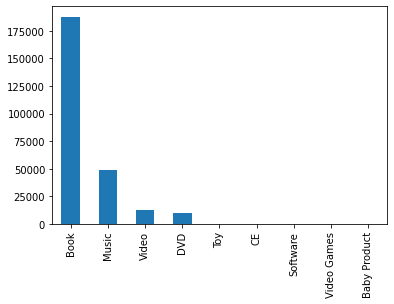

In [ ]:
node_groups = list(nx.get_node_attributes(g, 'group').values())
pd.value_counts(node_groups).plot.bar()

Thus, max no. of nodes are Books

visualize and analyze how the various products groups associate with each other.

when customer buy a product they may buy other products in different group.

59773 63246


(array([3.742e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.00000e+00, 2.26040e+03, 4.51880e+03, 6.77720e+03, 9.03560e+03,
        1.12940e+04, 1.35524e+04, 1.58108e+04, 1.80692e+04, 2.03276e+04,
        2.25860e+04]),
 <BarContainer object of 10 artists>)

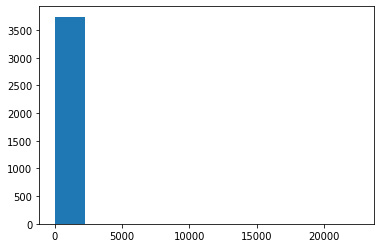

In [ ]:
DVD_nodes=set(df_meta[df_meta['group']=='DVD'].Id)
DVD_df=df[df.From_Node.isin(DVD_nodes) | df.To_Node.isin(DVD_nodes)]
 
g_DVD = nx.from_pandas_edgelist(DVD_df,'From_Node', 'To_Node')
nx.set_node_attributes(g_DVD, attr_dict, 'group')
print(g_DVD.number_of_nodes(), g_DVD.number_of_edges())

x = [g_DVD.subgraph(c) for c in nx.connected_components(g_DVD)]
# x = list(x)[0]
x=[len(c) for c in x]

plt.hist(x) 



In [ ]:
big_subg = [ g_DVD.subgraph(i) for i in nx.connected_components(g_DVD) if len(i) > 22000]

print(big_subg[0].number_of_nodes(), big_subg[0].number_of_edges())


22586 25959


3733
98 101


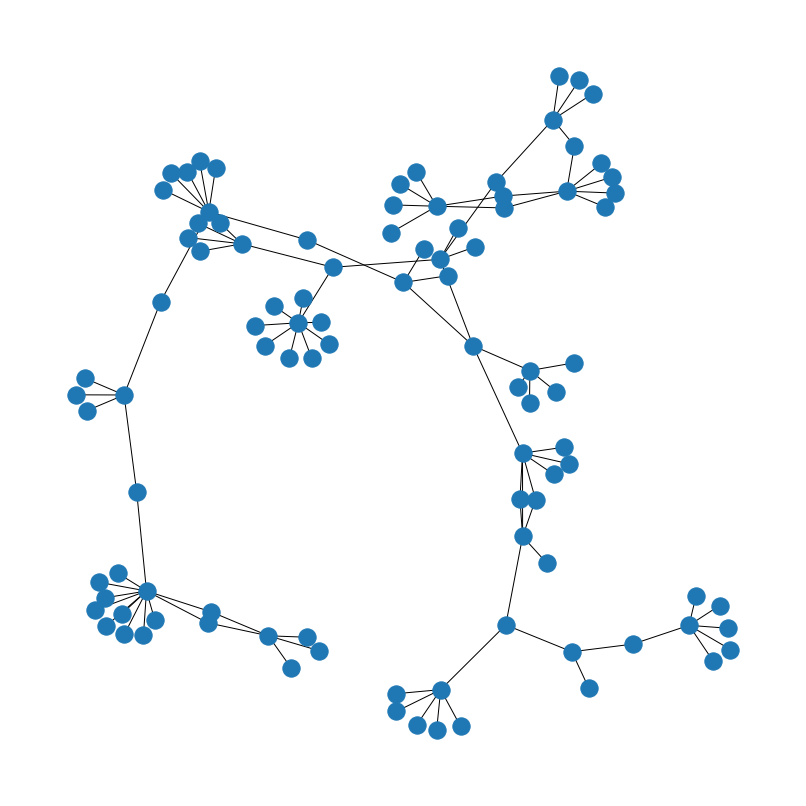

In [ ]:
mid_subg = [g_DVD.subgraph(i) for i in nx.connected_components(g_DVD) if len(i) < 100]
print(len(mid_subg))

l=[]
max=0
pos=0
for i in range(0,3733):
  x=len(mid_subg[i])
  l.append(len(mid_subg[i]))
  if x>max:
    pos=i
    max=x

print(mid_subg[pos].number_of_nodes(), mid_subg[pos].number_of_edges())
plt.figure(figsize=(11,11))
nx.draw(mid_subg[pos])

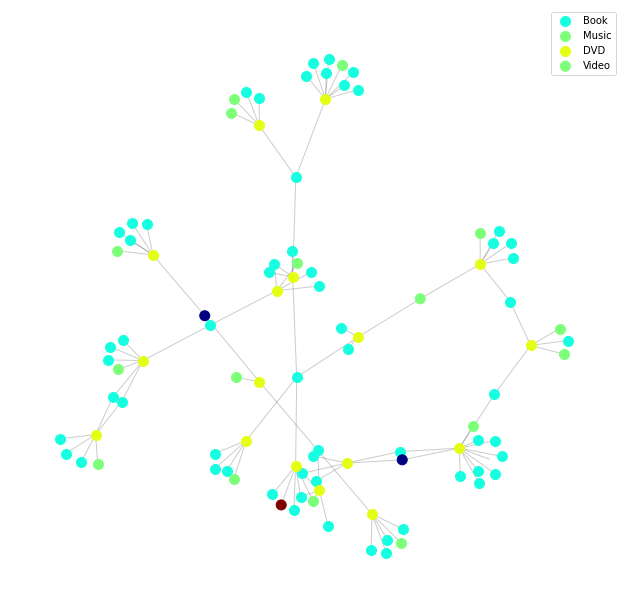

In [ ]:
plt.figure(figsize=(11,11))
groups = set(node_groups)
node_groups_dict = nx.get_node_attributes(mid_subg[pos], 'group')
colors = [plt.cm.jet(x) for x in np.linspace(0,1,len(groups))]
poss=nx.spring_layout(mid_subg[pos])

for i, groups in enumerate(groups):
  group_nodes=[node for node,value in node_groups_dict.items() if value == groups]
  nx.draw_networkx_nodes(mid_subg[pos], poss, nodelist=group_nodes, node_color=colors[i], label=groups, node_size=100, cmap=plt.cm.jet)
  
nx.draw_networkx_edges(mid_subg[pos], poss, alpha=0.2)

plt.legend()
plt.axis('off')
plt.show()




<Axes: >

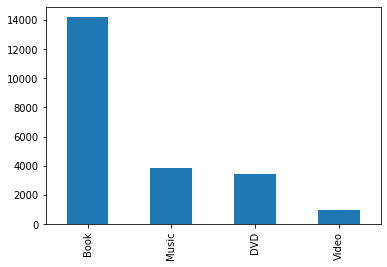

In [ ]:
node_groups = list(nx.get_node_attributes(big_subg[0], 'group').values())
pd.value_counts(node_groups).plot.bar()

In [ ]:
videos_nodes=set(df_meta[df_meta['group']=='Video'].Id)
DVD_video_df=DVD_df[DVD_df.From_Node.isin(videos_nodes) | DVD_df.To_Node.isin(videos_nodes)]

g_DVD_video = nx.from_pandas_edgelist(DVD_video_df, 'From_Node', 'To_Node')
nx.set_node_attributes(g_DVD_video, attr_dict, 'group')
print(g_DVD_video.number_of_nodes(), g_DVD_video.number_of_edges())



5118 3113


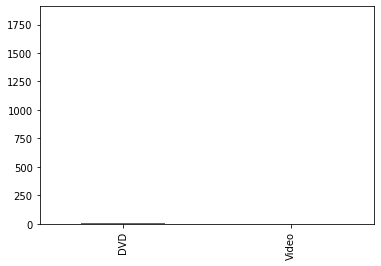

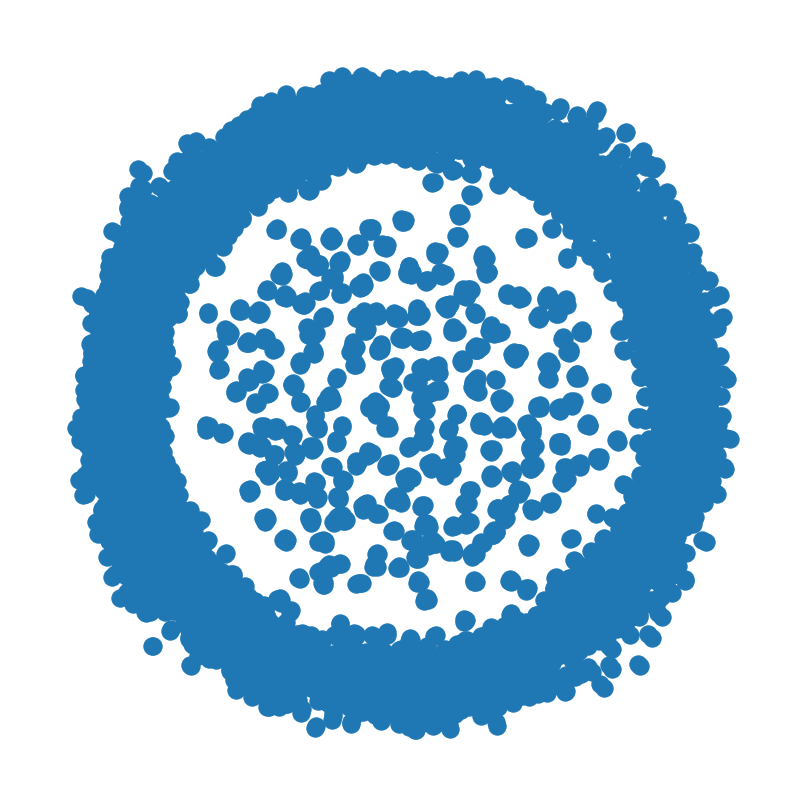

In [ ]:
y = [g_DVD_video.subgraph(c) for c in nx.connected_components(g_DVD_video)]
y=[len(c) for c in y]
plt.hist(y)

big_subg_dvd_vid = [g_DVD_video.subgraph(i) for i in nx.connected_components(g_DVD_video) if len(i) >5]
node_groups1 = list(nx.get_node_attributes(big_subg_dvd_vid[0], 'group').values())
pd.value_counts(node_groups1).plot.bar()
plt.figure(figsize=(11,11))
nx.draw(g_DVD_video)

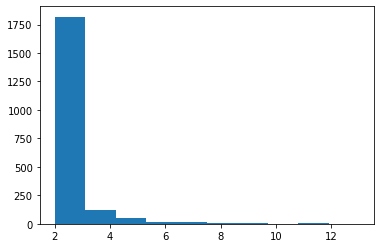

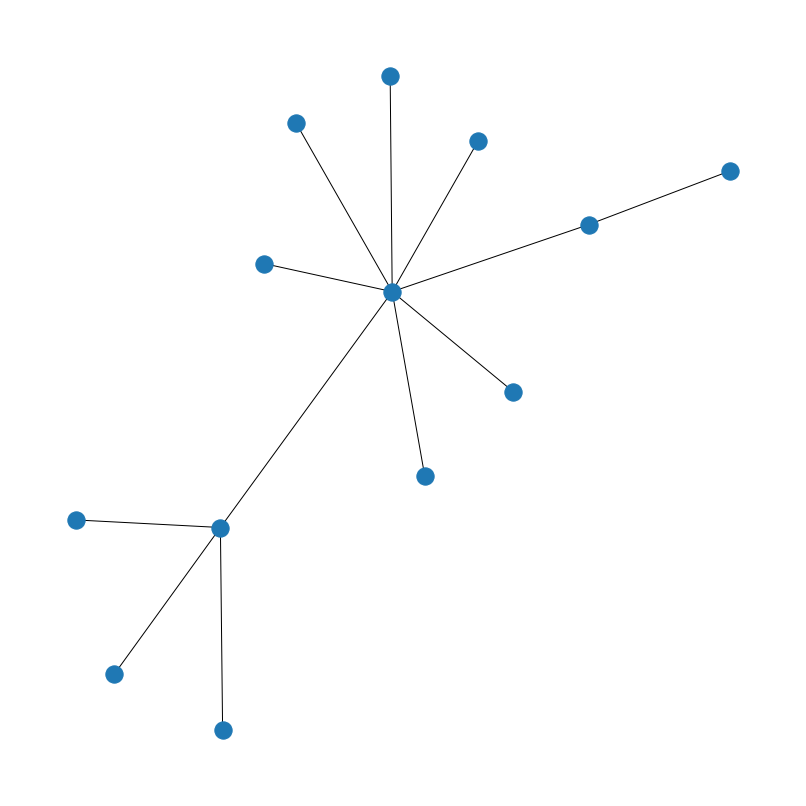

In [ ]:
y=[g_DVD_video.subgraph(c) for c in nx.connected_components(g_DVD_video)]
y=[len(c) for c in y]
plt.hist(y)
big_subg_dvd_vid = [g_DVD_video.subgraph(i) for i in nx.connected_components(g_DVD_video) if len(i) >12]
plt.figure(figsize=(11,11))
nx.draw(big_subg_dvd_vid[0])

Visualizing the network with the color coding for each type of product

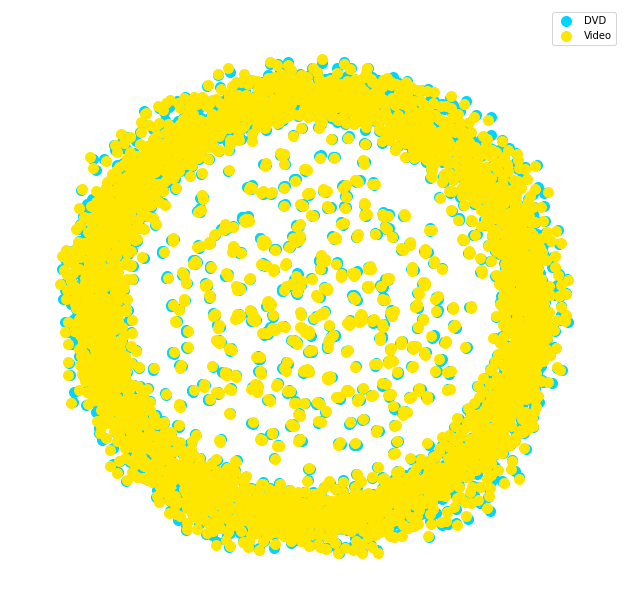

In [ ]:
plt.figure(figsize=(11,11))
groups = set(node_groups)
node_groups_dict=nx.get_node_attributes(g_DVD_video,'group')
colors = [plt.cm.jet(x) for x in np.linspace(0,1,len(groups))]
pos = nx.spring_layout(g_DVD_video)

for i,groups in enumerate(groups):
  group_nodes=[node for node, value in node_groups_dict.items() if value==groups]
  nx.draw_networkx_nodes(g_DVD_video, pos, nodelist=group_nodes, node_color=colors[i], label=groups, node_size=100, cmap=plt.cm.jet)

nx.draw_networkx_edges(g_DVD_video, pos, alpha=0.2)

plt.legend()
plt.axis('off')
plt.show()


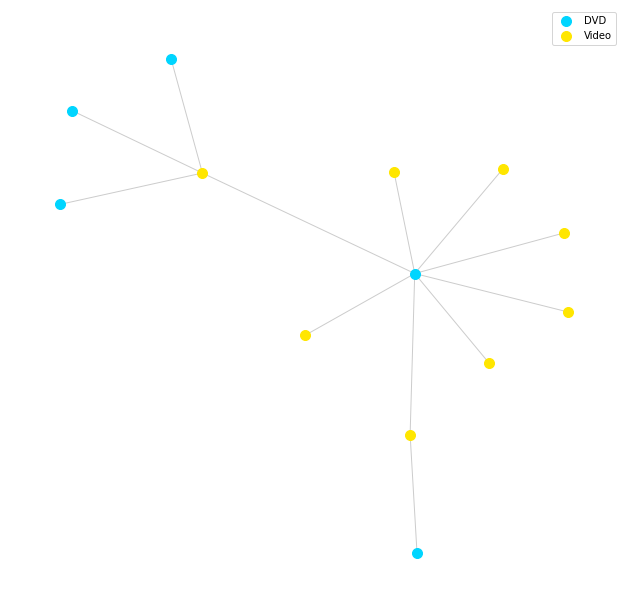

In [ ]:
plt.figure(figsize=(11,11))
groups = set(node_groups)
node_groups_dict=nx.get_node_attributes(big_subg_dvd_vid[0],'group')
colors = [plt.cm.jet(x) for x in np.linspace(0,1,len(groups))]
pos = nx.spring_layout(big_subg_dvd_vid[0])

for i,groups in enumerate(groups):
  group_nodes=[node for node, value in node_groups_dict.items() if value==groups]
  nx.draw_networkx_nodes(big_subg_dvd_vid[0], pos, nodelist=group_nodes, node_color=colors[i], label=groups, node_size=100, cmap=plt.cm.jet)

nx.draw_networkx_edges(big_subg_dvd_vid[0], pos, alpha=0.2)

plt.legend()
plt.axis('off')
plt.show()

##Network Analysis of dvd and video

Degree of centrality

In [ ]:
deg=nx.degree(big_subg_dvd_vid[0])
#listing top 10 influential nodes
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[0:10]

[(31034, 8),
 (33269, 4),
 (32879, 2),
 (102656, 1),
 (194273, 1),
 (40546, 1),
 (71653, 1),
 (197832, 1),
 (32877, 1),
 (44910, 1)]

In [ ]:
deg=nx.degree(g_DVD_video)
#listing top 10 influential nodes
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[0:10]

[(12615, 9),
 (31034, 8),
 (9121, 7),
 (10920, 6),
 (9264, 6),
 (163817, 6),
 (881, 5),
 (15644, 5),
 (14439, 5),
 (44755, 5)]

visualize the node with maximum degree of centality

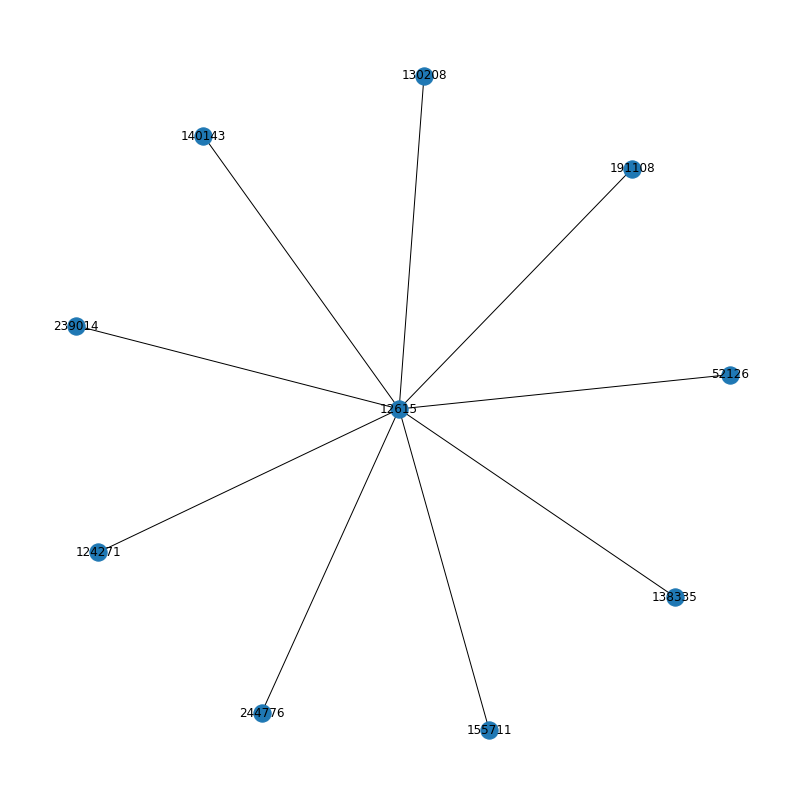

In [ ]:
max_deg_node = deg_list[0][0]
list_dn=list(g_DVD_video[max_deg_node])
list_dn.append(max_deg_node)
g_sub=g_DVD_video.subgraph(list_dn)
plt.figure(figsize=(11,11))
nx.draw(g_sub, with_labels=1)


Closeness centrality:- for each node we calculate the avg shortest path to any node on network

In [ ]:
g_close=nx.closeness_centrality(g_DVD_video)
g_close

g_close_sorted = sorted(g_close.items(), key=lambda kv: kv[1], reverse=True)
g_close_sorted

g_close_sorted_df=pd.DataFrame(g_close_sorted, columns=['node','closeness'])
g_close_sorted_df[:10]

,node,closeness
0,12615,0.001819
1,31034,0.001759
2,9121,0.001396
3,33269,0.001340
4,163817,0.001319
5,10920,0.001251
6,239014,0.001245
7,9264,0.001221
8,44755,0.001137
9,32879,0.001126


Betweenness Centrality(BC):- measure of degree to which nodes serve as bridges between parts of a network or,
Nodes with BC connects parts of network

Check the 10 nodes with highest betweenness



In [ ]:
node_betweenness = nx.betweenness_centrality(g_DVD_video)
betw_sorted = sorted(node_betweenness.items(), key=lambda kv: kv[1], reverse=True)
betw_sorted_df = pd.DataFrame(betw_sorted, columns=['node','betweenness'])
betw_sorted_df.iloc[0:10]

,node,betweenness
0,31034,0.000005
1,12615,0.000004
2,9121,0.000003
3,9264,0.000003
4,163817,0.000002
5,33269,0.000002
6,11427,0.000002
7,12403,0.000002
8,18164,0.000002
9,44755,0.000002


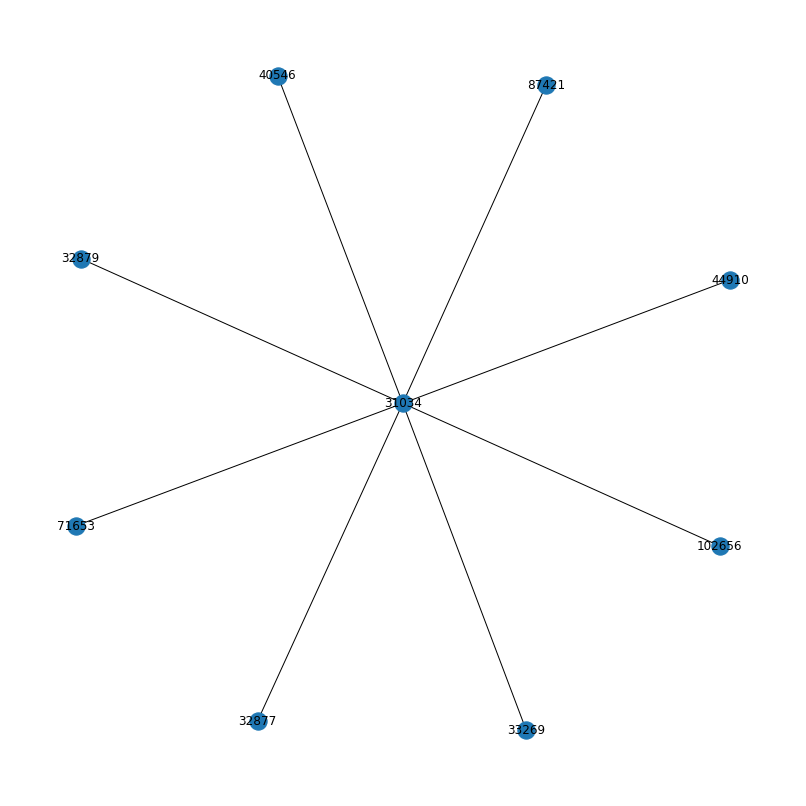

In [ ]:
plt.figure(figsize=(11,11))
g_ego = nx.ego_graph(g_DVD_video, betw_sorted_df.iloc[0,0])
nx.draw(g_ego, with_labels=True)

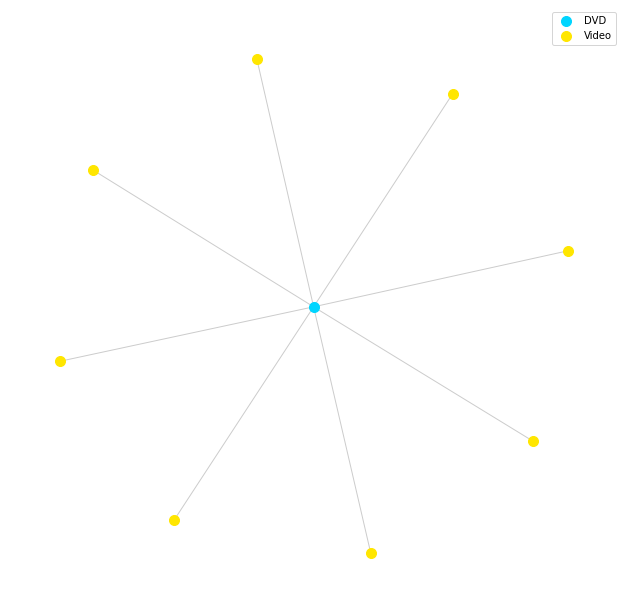

In [ ]:
plt.figure(figsize=(11,11))
groups = set(node_groups)
node_groups_dict = nx.get_node_attributes(g_ego, 'group')
colors = [plt.cm.jet(x) for x in np.linspace(0, 1, len(groups))]
pos = nx.spring_layout(g_ego)

for i, groups in enumerate(groups):
  group_nodes=[node for node, value in node_groups_dict.items() if value==groups]
  nx.draw_networkx_nodes(g_ego, pos, nodelist=group_nodes, node_color=colors[i],
                         label=groups, node_size=100, cmap=plt.cm.jet)
nx.draw_networkx_edges(g_ego, pos, alpha=0.2)

plt.legend()
plt.axis('off')
plt.show()


Thus, we able to see that the way a particular DVD links to videos.

**BOOK RECOMMENDATION SYSTEM**

Now, we re-process the meta data and create a simple recommendation system using network analysis and NLP to categories the books.

this helps to show the most similar book to another

In [ ]:
from pyparsing import Group
import string
import re
from nltk.corpus import stopwords
from nltk.stem import *
from __future__ import print_function
from nltk.stem.porter import *
import networkx
stemmer = PorterStemmer()

fname = "/content/drive/MyDrive/amazonData/amazon-meta.txt"
fhr = open(fname, 'r', encoding = 'utf8', errors = 'ignore')

amazonProducts = {}
(Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)

for line in fhr:
  lines = line.strip()
  if(line.startswith("Id")):
    Id = line[3:].strip()
  elif(line.startswith("ASIN")):
    ASIN = line[5:].strip()
  elif(line.startswith("title")):
    Title = line[6:].strip()
    Title = ' '.join(Title.split())
  elif(line.startswith("group")):
    Group = line[6:].strip()
  elif(line.startswith("salesrank")):
    SalesRank = line[10:].strip()
  elif(line.startswith("similar")):
    ls = line.split()
    Copurchased = ' '.join([c for c in ls[2:]])
  elif(line.startswith("categories")):
    ls = line.split()
    Categories = ' '.join((fhr.readline()).lower() for i in range(int(ls[1].strip())))
    Categories = re.compile('[%s]' % re.escape(string.digits+string.punctuation)).sub(' ', Categories)
    Categories = ' '.join(set(Categories.split())-set(stopwords.words("english")))
    Categories = ' '.join(stemmer.stem(word) for word in Categories.split())
  elif(line.startswith("reviews")):
    ls = line.split()
    TotalReviews = ls[2].strip()
    AvgRating = ls[7].strip()
  elif(line==""):
    try:
      MetaData = {}
      if(ASIN != ""):
        amazonProducts[ASIN] = MetaData
      MetaData['Id'] = Id
      MetaData['Title'] = Title
      MetaData['Categories'] = ' '.join(set(Categories.split()))
      MetaData['Group'] = Group
      MetaData['Copurchased'] = Copurchased
      MetaData['SalesRank'] = int(SalesRank)
      MetaData['TotalReviews'] = int(TotalReviews)
      MetaData['AvgRating'] = float(AvgRating)
      MetaData['DegreeCentrality'] = DegreeCentrality
      MetaData['ClusteringCoeff'] = ClusteringCoeff
    except NameError:
      continue
    (Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff)

fhr.close()

print(1+1)


2


Now, filter the amazonProduct dictionary to only Group=Book

In [ ]:
# from importlib.metadata import metadata
amazonBooks = {}
for asin, metadata in amazonProducts.items():
  if(metadata['Group'] == 'Book'):
    amazonBooks[asin] = amazonProducts[asin]

for asin, metadata in amazonBooks.items():
  amazonBooks[asin]['Copurchased'] = ' '.join([cp for cp in metadata['Copurchased'].split() if cp in amazonBooks.keys()])

print(1+1)

2


ASINs are nodes in the graph in which edge exist between two ASIN nodes. If two ASIN are connected then we create an edge weight based on category similarity

In [ ]:
copurchaseGraph = networkx.Graph()
for asin, metadata in amazonBooks.items():
  copurchaseGraph.add_node(asin)
  for a in metadata['Copurchased'].split():
    copurchaseGraph.add_node(a.strip())
    similarity = 0
    n1 = set((amazonBooks[asin]['Categories']).split())
    n2 = set((amazonBooks[a]['Categories']).split())
    n1In2 = n1 & n2
    n1Un2 = n1 | n2
    if(len(n1Un2)) > 0:
      similarity = round(len(n1In2)/len(n1Un2), 2)
    copurchaseGraph.add_edge(asin, a.strip(), weight=similarity)

print(1)

1


Add graph related values to each book item.

Clustering Coeff: measure of degree to which nodes tend to cluster together

In [ ]:
dc = networkx.degree(copurchaseGraph)
for asin in networkx.nodes(copurchaseGraph):
  metadata = amazonBooks[asin]
  metadata['DegreeCentrality'] = int(dc[asin])
  ego = networkx.ego_graph(copurchaseGraph, asin, radius=1)
  metadata['ClusteringCoeff'] = round(networkx.average_clustering(ego), 2)
  amazonBooks[asin] = metadata
print(1)

1


In [ ]:
# y=[copurchaseGraph.subgraph(c) for c in nx.connected_components(copurchaseGraph)]
# y=[len(c) for c in y]
# plt.hist(y)

# big_sub_book = [copurchaseGraph.subgraph(i) for i in nx.connected_components(copurchaseGraph) if len(i) < 12]

# l=[]
# max=0
# pos=0
# for i in range(0,12):
#   x= len(big_sub_book[i])
#   l.append(len(big_sub_book[i]))
#   if x>max:
#     pos=i
#     max=x
# print(big_sub_book[pos].number_of_nodes(), big_sub_book[pos].number_of_edges())
# plt.figure(figsize=(11,11))
# nx.draw(big_sub_book[pos], with_labels=True)
# print(1)

In [ ]:
fhw = open('/content/drive/MyDrive/amazonData/amazon-books.txt', 'w', encoding='utf-8', errors='ignore')
fhw.write("Id\t" + "ASIN\t" + "Title\t" + "Categories\t" + "Group\t" + "Copurchased\t" + "SalesRank\t" 
          + "TotalReviews\t" + "AvgRating\t" + "DegreeCentrality\t" + "ClusteringCoeff\n")

for asin,metadata in amazonBooks.items():
  fhw.write(metadata['Id'] + "\t" + asin + "\t" + metadata['Title'] + "\t" + metadata['Categories'] + "\t" + metadata['Group'] + "\t" + metadata['Copurchased'] + "\t" + str(metadata['SalesRank']) + "\t" + str(metadata['TotalReviews']) + "\t" + str(metadata['AvgRating']) + "\t" + str(metadata['DegreeCentrality']) + "\t" + str(metadata['ClusteringCoeff']) + "\n")
fhw.close()

fhw=open("/content/drive/MyDrive/amazonData/amazon-books-copurchase.edgelist",'wb')
networkx.write_weighted_edgelist(copurchaseGraph, fhw)
fhw.close()
print(1)

1


In [ ]:
import networkx
from operator import itemgetter
import matplotlib.pyplot

fhr = open('/content/drive/MyDrive/amazonData/amazon-books.txt', 'r', encoding='utf-8', errors='ignore')
amazonBooks = {}
fhr.readline()
for line in fhr:
  cell = line.split('\t')
  MetaData = {}
  MetaData['Id'] = cell[0].strip()
  ASIN = cell[1].strip()
  MetaData['Title'] = cell[2].strip()
  MetaData['Categories'] = cell[2].strip()
  MetaData['Group'] = cell[4].strip()
  MetaData['Copurchased'] = cell[5].strip()
  MetaData['SalesRank'] = int(cell[6].strip())
  MetaData['TotalReviews'] = int(cell[7].strip())
  MetaData['AvgRating'] = float(cell[8].strip())
  MetaData['DegreeCentrality'] = int(cell[9].strip())
  MetaData['ClusteringCoeff'] = float(cell[10].strip())
  amazonBooks[ASIN] = MetaData
fhr.close()

fhr = open("/content/drive/MyDrive/amazonData/amazon-books-copurchase.edgelist",'rb')
copurchaseGraph = networkx.read_weighted_edgelist(fhr)
fhr.close()
print(1)

1


In [ ]:
print("Recommendation for customers purchasing this Book:")
print("---------------------------------------------------")
purchasedAsin = '0805047905'

print("ASIN = ", purchasedAsin)
print("Title = ", amazonBooks[purchasedAsin]['Title'])
print("SalesRank = ", amazonBooks[purchasedAsin]['SalesRank'])
print("TotalReviews = ", amazonBooks[purchasedAsin]['TotalReviews'])
print("AvgRating = ", amazonBooks[purchasedAsin]['AvgRating'])
print("DegreeCentrality = ", amazonBooks[purchasedAsin]['DegreeCentrality'])
print("ClusteringCoeff = ", amazonBooks[purchasedAsin]['ClusteringCoeff'])

n=purchasedAsin
ego = networkx.ego_graph(copurchaseGraph, n, radius=1)
purchasedAsinEgoGraph = networkx.Graph(ego)

Recommendation for customers purchasing this Book:
---------------------------------------------------
ASIN =  0805047905


KeyError: ignored